### Центральная Предельная Теорема Своими Руками
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

**1)** Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее)

Выбираем: распределение $Beta (\alpha = 2,\beta = 5)$ 
- Сгенерируйте из него выборку объёма 1000
- Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).


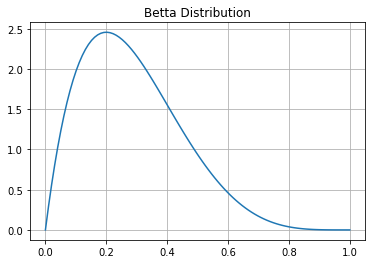

In [86]:
# Параметры распределения
alpha = 2
beta = 5

# Создаем распределение и генерируем выборку 
beta_dist = sts.beta(alpha, beta)
sample = beta_dist.rvs(1000)

# Взглянем на полученное распределение. Для этого определим область определения функции
x = np.linspace(0, 1, 100)
y = beta_dist.pdf(x) # получим область значений 

plt.plot(x,y);
plt.title('Betta Distribution')
plt.grid()

Теперь взглянем насколько хорошо наша выборка укладывается в данное распределение. **Обязательно** необходимо установить ```density=True``` иначе график функции распределения будет другого масштаба.

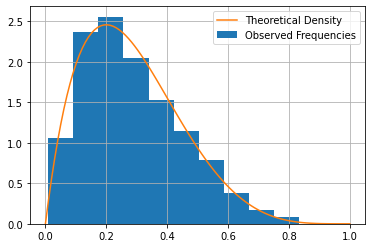

In [91]:
plt.hist(sample, density=True, label='Observed Frequencies')
plt.plot(x,y, label='Theoretical Density')
plt.legend()
plt.grid();

Видно, что наша выборка действительно была сгенерирована из бетта-распределения. Выборка неплохо укладывается в график функции плотности распределения. 

### Оценка Распределения Выборочного Среднего

**2)** Оценим распределение выборочного среднего случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних.

Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Для бетта-распределения:
- $M(x)=\frac{\alpha}{\alpha + \beta}$
- $D(x)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In [99]:
# Определим параметры для нормального распределения
mean = alpha/(alpha + beta)
sigma_squared = (alpha*beta)/(((alpha + beta)**2)*(alpha + beta + 1))

# Определим Функцию Отрисовки Распределения Выборочных Средних
def plot_sample_means_dist(distribution, sample_size=5, mu=mean, sigma_squared=sigma_squared):
    sample_means = []
    for _ in range(1000):
        sample_means.append(distribution.rvs(sample_size).mean())
    # Рисуем Гистограмму Выборочных Средних
    fig = plt.figure(figsize = (12,6))
    plt.hist(sample_means, density = True, label='Гистограмма Выборочных Средних')
    # Вычисляем значения для теоретической кривой
    norm_dist = sts.norm(mu, np.sqrt(sigma_squared/sample_size))
    x = np.linspace(0, 1, 100)
    y = norm_dist.pdf(x)
    plt.plot(x, y, label ='Теоретическая Кривая')
    plt.title("Размер Выборки %d" %sample_size)
    plt.ylabel('Доля Выборки $f(x)$')
    plt.xlabel('Выборочное Среднее $x$')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

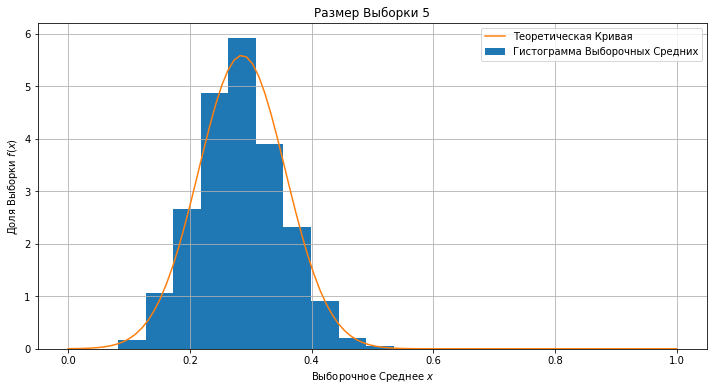

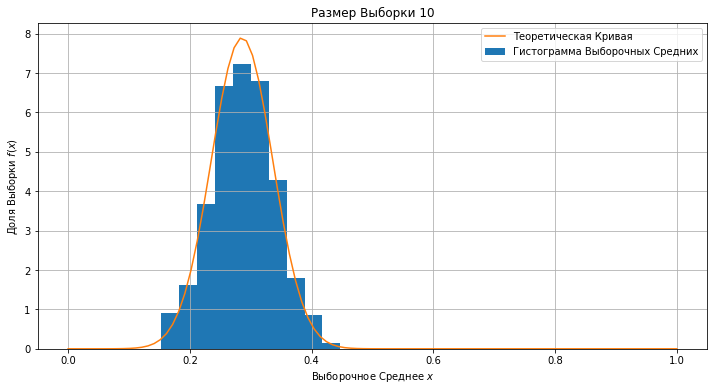

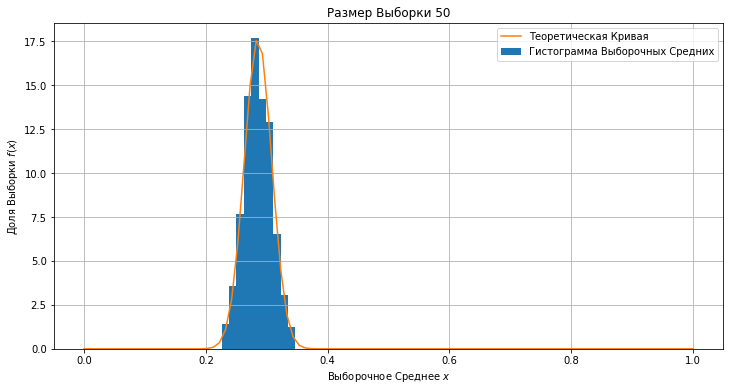

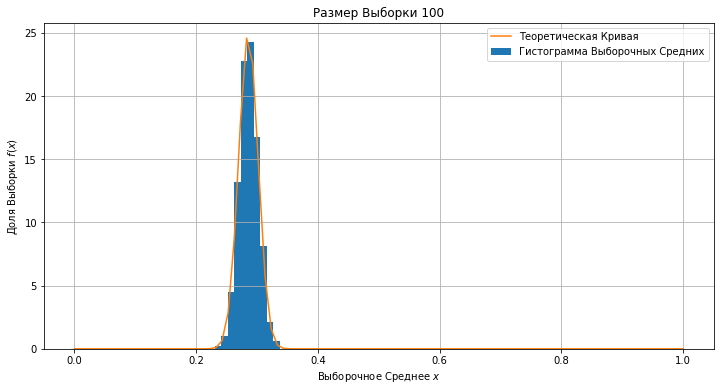

In [104]:
for s_size in [5,10,50,100]:
    plot_sample_means_dist(distribution=beta_dist,
                       sample_size=s_size,
                       mu=mean,
                       sigma_squared=sigma_squared)

**3)** Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

- C увеличением выборки, распределение средних начинает приближаться к 5 (следовательно СКО падает)
- Точность апроксимации теоретичсекой кривой растет
